In [139]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib inline

## Data Understanding

We will explore the dataset next.

In [140]:
# load the data

calendar = pd.read_csv("data/calendar.csv")
listings = pd.read_csv("data/listings.csv")
reviews = pd.read_csv("data/reviews.csv")

In [141]:
# basic info for each dataset

print("Calendar Info: ")
calendar.info();

Calendar Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
listing_id    1393570 non-null int64
date          1393570 non-null object
available     1393570 non-null object
price         934542 non-null object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [142]:
print("Listings Info: ")
listings.info();

Listings Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url          

In [143]:
print("Reviews Info: ")
reviews.info();

Reviews Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
listing_id       84849 non-null int64
id               84849 non-null int64
date             84849 non-null object
reviewer_id      84849 non-null int64
reviewer_name    84849 non-null object
comments         84831 non-null object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


In [144]:
# explore some data from each dataset

calendar.head(3)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN


In [145]:
listings.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,"Make your self at home in this charming one-bedroom apartment, centrally-located on the west side of Queen Anne hill. This elegantly-decorated, completely private apartment (bottom unit of a duplex) has an open floor plan, bamboo floors, a fully equipped kitchen, a TV, DVD player, basic cable, and a very cozy bedroom with a queen-size bed. The unit sleeps up to four (two in the bedroom and two on the very comfortable fold out couch, linens included) and includes free WiFi and laundry. The apartment opens onto a private deck, complete with it's own BBQ, overlooking a garden and a forest of black bamboo. The Apartment is perfectly-located just one block from the bus lines where you can catch a bus and be downtown Seattle in fifteen minutes or historic Ballard in ten or a quick five-minute walk will bring you to Whole Foods and Peet's Coffee or take a fifteen minute walk to the top of Queen Anne Hill where you will find a variety of eclectic shops, bars, and restaurants. There is no","Make your self at home in this charming one-bedroom apartment, centrally-located on the west side of Queen Anne hill. This elegantly-decorated, completely private apartment (bottom unit of a duplex) has an open floor plan, bamboo floors, a fully equipped kitchen, a TV, DVD player, basic cable, and a very cozy bedroom with a queen-size bed. The unit sleeps up to four (two in the bedroom and two on the very comfortable fold out couch, linens included) and includes free WiFi and laundry. The apartment opens onto a private deck, complete with it's own BBQ, overlooking a garden and a forest of black bamboo. The Apartment is perfectly-located just one block from the bus lines where you can catch a bus and be downtown Seattle in fifteen minutes or historic Ballard in ten or a quick five-minute walk will bring you to Whole Foods and Peet's Coffee or take a fifteen minute walk to the top of Queen Anne Hill where you will find a variety of eclectic shops, bars, and restaurants. There is no",none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,"Chemically sensitive? We've removed the irritants triggering allergy or asthma attacks, like carpeting, forced air & used pillows, all culprits that harbor fungus, mold & bacteria. No smoking, no pets. Designed for healthy living, so breathe easy.","Beautiful, hypoallergenic apartment in an extremely safe, quiet and pedestrian-friendly section of Queen Anne. A leafy-green location that puts the best of Seattle at your doorstep. Free WiFi, free parking, ...even free pillows! What's special about this place? Hypo-allergenic bedding, mattresses/covers and new pillows with each rental. (So feel free to take your new pillows with you!) A beautiful restoration mixing period details & modern sensibilities: Hardwood floors throughout, white subway tile, low/no VOCs & non-toxic paints keep this home-away-from-home clean, smart and healthy. Radiant heat and oil radiators mean no blowing hot air or dust. Great Amenities: Free WiFi & internet TV (LED flatscreen). Fully-equipped kitchen with stainless-steel appliances, sink & disposal. Large washer & dryer. Iron/ironing board. Hairdryer. Plenty of storage. Convenient parking, both on- and off-street. The Best Location: Enjoy Seattle's celebrated Macrina bakery, neighborhood cafes, boutiqu","Chemically sensitive? We've removed the irritants triggering allergy or asthma attacks, like carpeting, forced air & used pillows, all culprits that harbor fungu

In [146]:
reviews.head(3)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to everything!
1,7202016,39087409,2015-07-20,32440555,Frank,"Kelly has a great room in a very central location. \r\nBeautiful building , architecture and a style that we really like. \r\nWe felt guite at home here and wish we had spent more time.\r\nWent for a walk and found Seattle Center with a major food festival in progress. What a treat.\r\nVisited the Space Needle and the Chihuly Glass exhibit. Then Pikes Place Market. WOW. Thanks for a great stay."
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighborhood. This is the kind of apartment I wish I had!\r\n\r\nDidn't really get to meet Kelly until I was on my out, but she was always readily available by phone. \r\n\r\nI believe the only ""issue"" (if you want to call it that) was finding a place to park, but I sincerely doubt its easy to park anywhere in a residential area after 5 pm on a Friday"


The `reviews` dataset doesn't have any quantifiable information that we can use to answer our questions. So, we won't consider the dataset at all.

We will look at the `calendar` dataset first, and check the date range for our records.

In [147]:
# print oldest and latest date from calendar

print(min(calendar["date"]), max(calendar["date"]))

2016-01-04 2017-01-02


So our data is from 4th January 2016, to 2nd January 2017. 

## Data Preparation

We'll start exploring more of the datasets and prepare them to be able to effectively answer the questions we posed previously.

The `price` column has some NaNs. Let's check if they can be removed or if those are dependent on whether or not the listing is available.

In [148]:
# print number of NaN rows for `price` where `available` is `t`

print(calendar[(calendar["price"].isnull()) & (calendar["available"] == 't')])

Empty DataFrame
Columns: [listing_id, date, available, price]
Index: []


So, the pricing is null when the listing is not available. We can then disregard the `available` column. Let's create a copy of the dataset and clean up based on what we have explored so far. We will also convert the `price` column into a float dtype, and the `date` column into datetime

In [149]:
# create copy of dataset
calendar_clean = calendar.copy()

# drop column
calendar_clean = calendar_clean.drop(columns=["available"])

# convert date column to datetime type
calendar_clean["date"]= pd.to_datetime(calendar_clean["date"], format='%Y-%m-%d')

# convert price from string to float
calendar_clean["price"] = calendar_clean["price"].str.replace("$","").str.replace(",","").astype(float)

# rename price column name to price_dollars
calendar_clean.rename(columns ={"price":"price_dollars"}, inplace=True)
print(calendar_clean.head(2))
calendar_clean.info()

   listing_id       date  price_dollars
0  241032     2016-01-04  85.0         
1  241032     2016-01-05  85.0         
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 3 columns):
listing_id       1393570 non-null int64
date             1393570 non-null datetime64[ns]
price_dollars    934542 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 31.9 MB


Let's check number of unique listings and also how many NaN prices there are. We can then decide to remove the NaN records accordingly

In [150]:
# unique listings 
print(calendar_clean["listing_id"].unique().shape[0])

# average listings per listing id
print(calendar_clean.groupby("listing_id").size().sort_values(ascending=True))

# NaN prices
print(calendar_clean["price_dollars"].isnull().value_counts())

# Number of NaN prices per listing id
nan_price_per_listing = calendar_clean.groupby("listing_id").apply(lambda x: x["price_dollars"].isnull().sum())
print(nan_price_per_listing)

3818
listing_id
3335        365
7483750     365
7492006     365
7492877     365
7496485     365
           ... 
4122325     365
4125779     365
4126284     365
4104442     365
10340165    365
Length: 3818, dtype: int64
False    934542
True     459028
Name: price_dollars, dtype: int64
listing_id
3335        56 
4291        0  
5682        56 
6606        0  
7369        312
           ... 
10332096    0  
10334184    4  
10339144    365
10339145    0  
10340165    7  
Length: 3818, dtype: int64


In [151]:
# listings with more than 300 missing prices
print(nan_price_per_listing[nan_price_per_listing[nan_price_per_listing.index] > 300])

listing_id
7369        312
9460        308
53867       345
107046      365
107962      328
           ... 
10250735    361
10252110    346
10299195    351
10319529    364
10339144    365
Length: 480, dtype: int64


So, each listing has records for each day of the year. There are some listings which don't have a price for most, if not all, days of the year (that is, they are unavailable). But even then, there are quite a lot of listings which are unavailable for large chunks of the year.

We create a new column in `calendar` that contains the month extracted from the date column. This will allow us to answer our first question.

In [152]:
# create new column to store month information
calendar_clean["month"] = calendar_clean["date"].dt.month

Next, we'll look at the `listings` dataset. That dataset has a total of 92 columns, and quite a few of them are not needed. We will begin by removing columns which - 

- contain descriptive text (like comments, and details about the neighborhood etc)
- contain urls
- are not required to answer our questions (like the geography-based columns)
- contain a large number of null values

In [153]:
# create list of columns to drop
listings_col_to_drop = ["listing_url", "scrape_id", "last_scraped", "summary", "space", "description", 
                        "experiences_offered", "neighborhood_overview", "notes", "host_location", "host_about",
                        "street", "city", "state", "zipcode","neighbourhood","neighbourhood_cleansed",
                        "neighbourhood_group_cleansed","first_review","last_review","host_name",
                        "country_code", "country", "latitude", "longitude","jurisdiction_names",
                        "calendar_last_scraped","calendar_updated","name"
]

# iterate over columns to identify url columns and add to above list

for col in listings.columns:
    if "url" in col:
        listings_col_to_drop.append(col)
        
# remove columns with lots of null values
listings_col_to_drop.append("square_feet")
listings_col_to_drop.append("license")

listings_clean = listings.drop(columns = listings_col_to_drop)

print(listings_clean.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 54 columns):
id                                  3818 non-null int64
transit                             2884 non-null object
host_id                             3818 non-null int64
host_since                          3816 non-null object
host_response_time                  3295 non-null object
host_response_rate                  3295 non-null object
host_acceptance_rate                3045 non-null object
host_is_superhost                   3816 non-null object
host_neighbourhood                  3518 non-null object
host_listings_count                 3816 non-null float64
host_total_listings_count           3816 non-null float64
host_verifications                  3818 non-null object
host_has_profile_pic                3816 non-null object
host_identity_verified              3816 non-null object
market                              3818 non-null object
smart_location                      38

Some columns above need to be converted from object (string) to integer or float to allow us to find correlation between the features in a better way. Most of these are related to `price`.

In [154]:
# convert string price related columns to float types
listings_clean["price"] = listings_clean["price"].str.replace("$","").str.replace(",","").astype(float)
listings_clean["weekly_price"] = listings_clean["weekly_price"].str.replace("$","").str.replace(",","").astype(float)
listings_clean["monthly_price"] = listings_clean["monthly_price"].str.replace("$","").str.replace(",","").astype(float)

In [155]:
listings_clean.head(1)

,id,transit,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,NaN,956883,2011-08-11,within a few hours,96%,100%,f,Queen Anne,3.0,...,10.0,9.0,10.0,f,f,moderate,f,f,2,4.07


Eventually, we wish to find the correlation between prices and amenities. However, the `amenities` column consists of strings of amenities offered at the listing.

In [156]:
# set pandas option to display entire column width
pd.set_option('display.max_colwidth', -1)
listings_clean.loc[1:4,"amenities"]

1    {TV,Internet,"Wireless Internet",Kitchen,"Free Parking on Premises","Buzzer/Wireless Intercom",Heating,"Family/Kid Friendly",Washer,Dryer,"Smoke Detector","Carbon Monoxide Detector","First Aid Kit","Safety Card","Fire Extinguisher",Essentials}                                                
2    {TV,"Cable TV",Internet,"Wireless Internet","Air Conditioning",Kitchen,"Free Parking on Premises","Pets Allowed","Pets live on this property",Dog(s),Cat(s),"Hot Tub","Indoor Fireplace",Heating,"Family/Kid Friendly",Washer,Dryer,"Smoke Detector","Carbon Monoxide Detector",Essentials,Shampoo}
3    {Internet,"Wireless Internet",Kitchen,"Indoor Fireplace",Heating,"Family/Kid Friendly",Washer,Dryer,"Smoke Detector","Carbon Monoxide Detector","Safety Card","Fire Extinguisher",Essentials,Shampoo}                                                                                              
4    {TV,"Cable TV",Internet,"Wireless Internet",Kitchen,Heating,"Family/Kid Friendly","Smoke Detector","Carb

Each listing has a variable number of amenities. We will extract these amenities and create separate columns for each indicating whether or not that amenity is present for that listing or not.

First, we will conver the strings into a list of the amenities. And then we will extract all the unique amenities from the `amenities` column.

In [157]:
# convert string for each row into a list of the items in the string.

amenities_lst = []
for row in listings_clean["amenities"]:
    row=row.replace("{","")
    row=row.replace("}","")
    row=row.replace("\"","")
    amenities_lst.append(row.split(","))

# extract unique amenities
unique_amenities = set()
for items in amenities_lst:
    for item in items:
        unique_amenities.add(item)
print(unique_amenities)
print(len(unique_amenities))

{'Heating', 'Cable TV', 'Suitable for Events', '', '24-Hour Check-in', 'Kitchen', 'Pool', 'TV', 'Pets live on this property', 'Breakfast', 'Iron', 'Shampoo', 'Elevator in Building', 'Air Conditioning', 'Washer', 'Wheelchair Accessible', 'Gym', 'Hangers', 'Essentials', 'Laptop Friendly Workspace', 'Buzzer/Wireless Intercom', 'Doorman', 'Pets Allowed', 'Dog(s)', 'Smoking Allowed', 'First Aid Kit', 'Safety Card', 'Wireless Internet', 'Fire Extinguisher', 'Hot Tub', 'Dryer', 'Smoke Detector', 'Other pet(s)', 'Washer / Dryer', 'Lock on Bedroom Door', 'Hair Dryer', 'Internet', 'Indoor Fireplace', 'Cat(s)', 'Family/Kid Friendly', 'Free Parking on Premises', 'Carbon Monoxide Detector'}
42


There are quite a few unique amenities. We will create new columns for each of the above, where the rows will indicate whether the amenity is present for a particular listing (1) or not (0).

In [158]:
# Personal ToDo - Find a more efficient way to implement the following
for idx,row in enumerate(amenities_lst):
    for amenity in unique_amenities:
        if amenity in row:
            listings_clean.loc[idx, amenity] = 1
        else:
            listings_clean.loc[idx, amenity] = 0

listings_clean.head(1)

,id,transit,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,...,Other pet(s),Washer / Dryer,Lock on Bedroom Door,Hair Dryer,Internet,Indoor Fireplace,Cat(s),Family/Kid Friendly,Free Parking on Premises,Carbon Monoxide Detector
0,241032,NaN,956883,2011-08-11,within a few hours,96%,100%,f,Queen Anne,3.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


Now that we have amenities as their own columns, we can use them to find correlation with price.

Next, we will look at property types and check if there is any problem with the data corresponding to each types or not.

In [159]:
listings_clean["property_type"].describe()

count     3817 
unique    16   
top       House
freq      1733 
Name: property_type, dtype: object

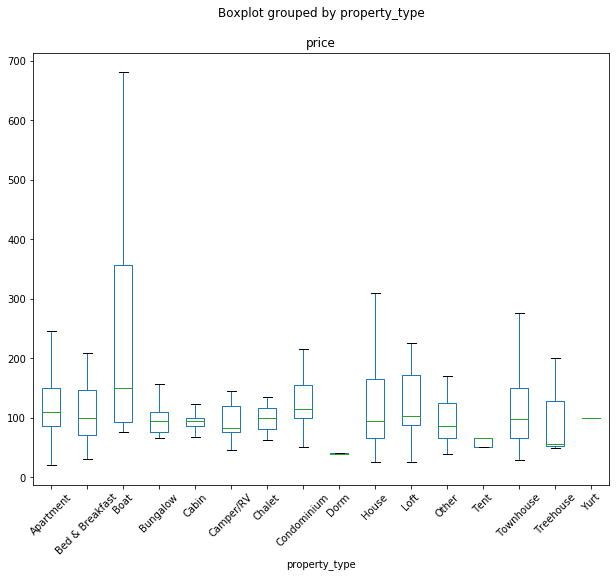

In [160]:
#listings_clean.groupby("property_type")["price"].mean().sort_values(ascending=False).plot.bar()
listings_clean.boxplot("price", by = "property_type", showfliers=False, rot=45, figsize=(10,8), grid = False)

There are some properties that don't have many records associated with them. We will check the number of records for each and then drop those rows accordingly.

In [167]:
# count number of rows for Dorm, Tent, and Yurt property types
print("Dorm Rows: ", listings_clean[listings_clean["property_type"] == "Dorm"].shape[0])
print("Tent Rows: ", listings_clean[listings_clean["property_type"] == "Tent"].shape[0])
print("Yurt Rows: ", listings_clean[listings_clean["property_type"] == "Yurt"].shape[0])

# drop rows corresponding to the above 3

listings_clean.drop(listings_clean[listings_clean["property_type"] == "Dorm"].index, inplace=True)
listings_clean.drop(listings_clean[listings_clean["property_type"] == "Tent"].index, inplace=True)
listings_clean.drop(listings_clean[listings_clean["property_type"] == "Yurt"].index, inplace=True)

listings_clean["property_type"].unique()

Dorm Rows:  2
Tent Rows:  5
Yurt Rows:  1


array(['Apartment', 'House', 'Cabin', 'Condominium', 'Camper/RV',
       'Bungalow', 'Townhouse', 'Loft', 'Boat', 'Bed & Breakfast',
       'Other', 'Treehouse', 'Chalet', nan], dtype=object)

There are still rows with NaN values. Let's check how many

In [184]:
print("Number of NaNs: ", listings_clean[listings_clean["property_type"].isnull()].shape[0])

# drop the row
listings_clean.dropna(subset = ["property_type"], inplace = True)

listings_clean["property_type"].unique()


Number of NaNs:  0


array(['Apartment', 'House', 'Cabin', 'Condominium', 'Camper/RV',
       'Bungalow', 'Townhouse', 'Loft', 'Boat', 'Bed & Breakfast',
       'Other', 'Treehouse', 'Chalet'], dtype=object)

## Answering Business Questions

### 1. What is the average price of the listings in Seattle each month?

We previously identified that there were listings that were unavailable and therefore their prices were not available as well. So, for this question, we will not count the NaN prices for those listings.

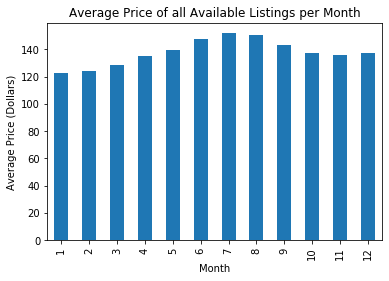

In [36]:
calendar_clean.groupby("month")["price_dollars"].mean().plot.bar()
plt.xlabel("Month")
plt.ylabel("Average Price (Dollars)")
plt.title("Average Price of all Available Listings per Month");

So, we see the average price of the listings being higher during the Summer-Fall months.

### 2. What is the correlation between price of a listing, the amenities/services that listing offers, and the reviews of that listing?


So, we will use specific columns from the `listings_clean` dataset to find this correlation.

In [89]:
listings_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 96 columns):
id                                  3818 non-null int64
transit                             2884 non-null object
host_id                             3818 non-null int64
host_since                          3816 non-null object
host_response_time                  3295 non-null object
host_response_rate                  3295 non-null object
host_acceptance_rate                3045 non-null object
host_is_superhost                   3816 non-null object
host_neighbourhood                  3518 non-null object
host_listings_count                 3816 non-null float64
host_total_listings_count           3816 non-null float64
host_verifications                  3818 non-null object
host_has_profile_pic                3816 non-null object
host_identity_verified              3816 non-null object
market                              3818 non-null object
smart_location                      38

Based on the above, we won't be considering all price-related columns because of significant missing values.

In [114]:
corr_columns = ["price","bathrooms","bedrooms","beds",
                             "number_of_reviews","review_scores_rating", "review_scores_value"]

# add amenities columns
unique_amenities_lst = list(unique_amenities)
corr_columns.extend(unique_amenities_lst)
price_corr = listings_clean[corr_columns]
price_corr = price_corr.drop(columns=[""])

print(price_corr.info())
price_corr.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 48 columns):
price                         3818 non-null float64
bathrooms                     3802 non-null float64
bedrooms                      3812 non-null float64
beds                          3817 non-null float64
number_of_reviews             3818 non-null int64
review_scores_rating          3171 non-null float64
review_scores_value           3162 non-null float64
Heating                       3818 non-null float64
Cable TV                      3818 non-null float64
Suitable for Events           3818 non-null float64
24-Hour Check-in              3818 non-null float64
Kitchen                       3818 non-null float64
Pool                          3818 non-null float64
TV                            3818 non-null float64
Pets live on this property    3818 non-null float64
Breakfast                     3818 non-null float64
Iron                          3818 non-null float64
Shampoo    

,price,bathrooms,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_value,Heating,Cable TV,Suitable for Events,...,Other pet(s),Washer / Dryer,Lock on Bedroom Door,Hair Dryer,Internet,Indoor Fireplace,Cat(s),Family/Kid Friendly,Free Parking on Premises,Carbon Monoxide Detector
0,85.0,1.0,1.0,1.0,207,95.0,10.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


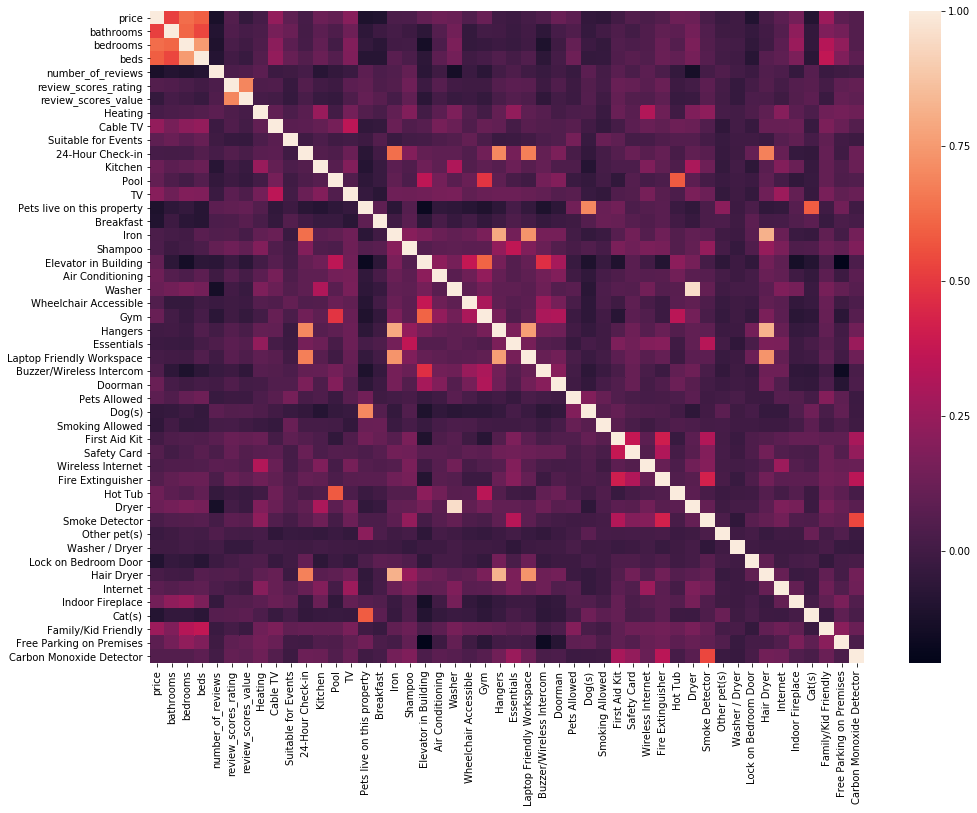

In [115]:
# plot heatmap
fig, ax = plt.subplots(figsize=(16,12))
sb.heatmap(price_corr.corr())

In [116]:
# Printing out the top 10 (including price) variables positively correlated with price
price_corr.corr()["price"].sort_values(ascending=False).nlargest(10)

price                  1.000000
bedrooms               0.627720
beds                   0.589525
bathrooms              0.516424
Family/Kid Friendly    0.259901
Cable TV               0.237309
TV                     0.205824
Indoor Fireplace       0.148466
Air Conditioning       0.130271
Hot Tub                0.127066
Name: price, dtype: float64

There are some strong positive correlations between the price and the number of bathrooms, bedrooms, and beds. However, it's interesting to see that there is no strong correlation between the price and any particular amenity, relatively speaking. 

Review scores ratings have a much lower positive correlation to the price as well.

There are still positive correlations between the price and the amenities, with "Cable TV" and "Family/Kid Friendly" being the highest.

### 3. Which property types have the highest average price?

We will look at the average price across different property types for the final question.

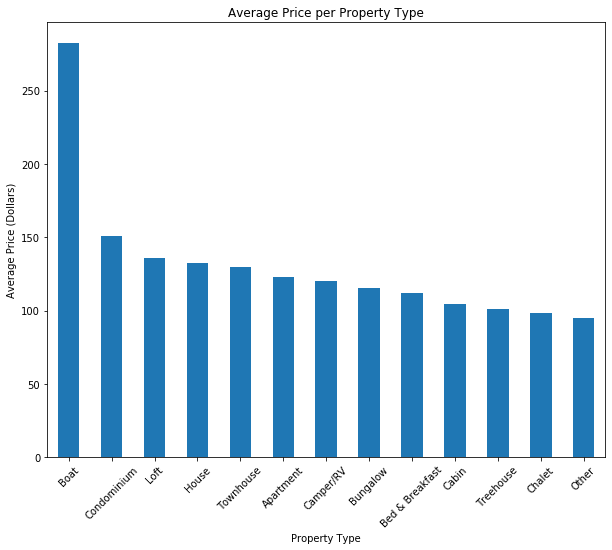

In [190]:
fig, ax = plt.subplots(figsize=(10,8))

listings_clean.groupby("property_type")["price"].mean().sort_values(ascending=False).plot.bar()
plt.xlabel("Property Type")
plt.ylabel("Average Price (Dollars)")
plt.title("Average Price per Property Type")
plt.xticks(rotation=45);

In [188]:
# Top 3 property types based on average price
listings_clean.groupby("property_type")["price"].mean().nlargest(3)

property_type
Boat           282.37500
Condominium    151.10989
Loft           135.70000
Name: price, dtype: float64

We can clearly see that listings where the property is a boat have the highest average price of about $\$$282. Followed by Condominium ($\$$151) and Loft ($\$$136)